In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# close = pd.Series([...])  # Load close prices here
close = pd.Series([100 + np.sin(i/10) for i in range(100)])

In [3]:
# EMA parameters
emaS_value = 12  # Small EMA period
emaB_value = 20  # Big EMA period

# Calculate EMAs
emaS = close.ewm(span=emaS_value, adjust=False).mean()
emaB = close.ewm(span=emaB_value, adjust=False).mean()

# Colors and arrow options
EMA_UpTrend_color = "#00ff00"
EMA_DownTrend_color = "#ff0000"
arrowColorUp = "#00ff00"
arrowColorDown = "#ff0000"
arrowSize = 50  # for plot visualization

In [4]:
# Determine uptrend and downtrend
EMA_UpTrend = emaS >= emaB
EMA_DownTrend = emaS < emaB

# Track crossover state
crossover = np.nan  # Initialize crossover state
crossover_signals = []  # To store crossover events for plotting

In [5]:
# Detect crossover events
for i in range(1, len(close)):
    if EMA_UpTrend[i - 1] and EMA_DownTrend[i]:
        crossover = -1  # Downtrend crossover
    elif EMA_DownTrend[i - 1] and EMA_UpTrend[i]:
        crossover = 1  # Uptrend crossover
    else:
        crossover = np.nan  # No crossover

    crossover_signals.append(crossover)

In [6]:
# Convert crossover signals to Series for easier plotting
crossover_signals = pd.Series(crossover_signals, index=close.index[:-1])

EMA Trend Down - Crossover at index 27
EMA Trend Up - Crossover at index 59
EMA Trend Down - Crossover at index 91


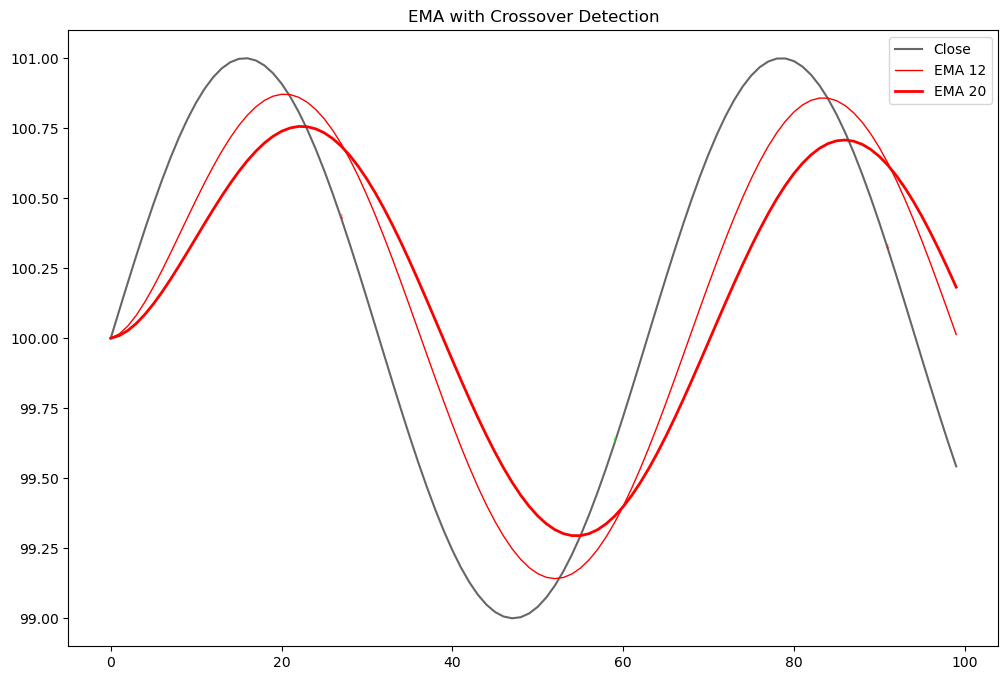

In [7]:
# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(close, label='Close', color='black', alpha=0.6)
plt.plot(emaS, label=f'EMA {emaS_value}', color=EMA_UpTrend_color if EMA_UpTrend.iloc[-1] else EMA_DownTrend_color, linewidth=1)
plt.plot(emaB, label=f'EMA {emaB_value}', color=EMA_UpTrend_color if EMA_UpTrend.iloc[-1] else EMA_DownTrend_color, linewidth=2)

# Plot arrows for crossover points
for i, signal in enumerate(crossover_signals):
    if signal == 1:  # Up crossover
        plt.annotate('↑', (i, close[i]), color=arrowColorUp, fontsize=arrowSize / 10, ha='center')
    elif signal == -1:  # Down crossover
        plt.annotate('↓', (i, close[i]), color=arrowColorDown, fontsize=arrowSize / 10, ha='center')

# Show alerts for trend changes (console output)
for i, signal in enumerate(crossover_signals):
    if signal == 1:
        print(f"EMA Trend Up - Crossover at index {i}")
    elif signal == -1:
        print(f"EMA Trend Down - Crossover at index {i}")

plt.legend()
plt.title("EMA with Crossover Detection")
plt.show()